In [9]:
import os
import PIL.Image as Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
def load_images_from_folder(folder_path):
  train_images = []
  train_labels = []
  test_images = []
  test_labels = []
  # at the first iteration want it to catch the train data, and then the test ones at the second
  for iteration, subfolder_1 in enumerate(os.listdir(folder_path)): # train, test
    print(f"Loading from {subfolder_1}:")
    subfolder_1_path = os.path.join(folder_path, subfolder_1)
    for label, subfolder_2 in enumerate(os.listdir(subfolder_1_path)): # ants, bees
      print(f"At iteration {iteration} - {subfolder_1}, {subfolder_2}")
      subfolder_2_path = os.path.join(subfolder_1_path, subfolder_2) 
      for file in os.listdir(subfolder_2_path):
        image_path = os.path.join(subfolder_2_path, file)
        try:
          image = Image.open(image_path).convert('RGB').resize((32, 32))
          image = np.array(image)
          if iteration == 0:
            train_images.append(image)
            train_labels.append(label)
          else:
            test_images.append(image)
            test_labels.append(label)
        except Exception as e:
          print(f"Error loading image {image_path}: {e}")
  return (np.array(train_images), np.array(train_labels)), (np.array(test_images), np.array(test_labels))

In [62]:
# load the images data using the built function
image_path = r'C:\Users\Houcine DG\OneDrive\Bureau\Master Data Science\s3\deep learning medical - Afdel\hymenoptera_data'
(train_images, train_labels), (test_images, test_labels) = load_images_from_folder(image_path)

Loading from train:
At iteration 0 - train, ants
At iteration 0 - train, bees
Loading from val:
At iteration 1 - val, ants
At iteration 1 - val, bees


In [66]:
# print data shapes
print(f"train_images shape: {train_images.shape}, test_images shape: {test_images.shape}")
print(f"train_labels shape: {train_labels.shape}, test_labels shape: {test_labels.shape}")

train_images shape: (245, 32, 32, 3), test_images shape: (153, 32, 32, 3)
train_labels shape: (245,), test_labels shape: (153,)


Text(0.5, 1.0, '0')

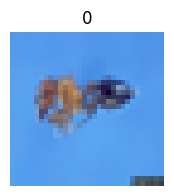

In [74]:
# show the first traing image and its label
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(train_images[0])
plt.title(train_labels[0])